In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [7]:
#resnet101
model = InceptionV3(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

87916544/87910968 [==============================] - 2s 0us/step


In [8]:
#adding new layers
x = model.output
x = Flatten()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
for layer in model.layers[:-7]: #use last 7 layers
    layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [11]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 315s 3s/step - loss: 1.7766 - acc: 0.3580 - val_loss: 1.0605 - val_acc: 0.4375
Epoch 2/25
100/100 [==============================] - 49s 486ms/step - loss: 1.3074 - acc: 0.5176 - val_loss: 1.1393 - val_acc: 0.5616
Epoch 3/25
100/100 [==============================] - 15s 154ms/step - loss: 1.0367 - acc: 0.6344 - val_loss: 0.0504 - val_acc: 0.5890
Epoch 4/25
100/100 [==============================] - 15s 147ms/step - loss: 0.9462 - acc: 0.6608 - val_loss: 0.8397 - val_acc: 0.7000
Epoch 5/25
100/100 [==============================] - 16s 155ms/step - loss: 0.8982 - acc: 0.6922 - val_loss: 1.8309 - val_acc: 0.6575
Epoch 6/25
100/100 [==============================] - 14s 144ms/step - loss: 0.7814 - acc: 0.7312 - val_loss: 0.0697 - val_acc: 0.6712
Epoch 7/25
100/100 [==============================] - 16s 156ms/step - loss: 0.7836 - acc: 0.7125 - val_loss: 0.7407 - val_acc: 0.6625
Epoch 8/25
100/100 [==============================] - 15s

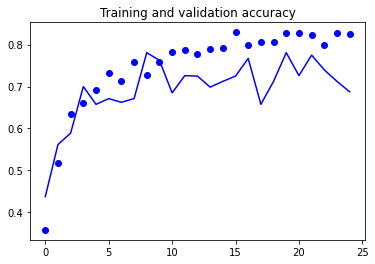

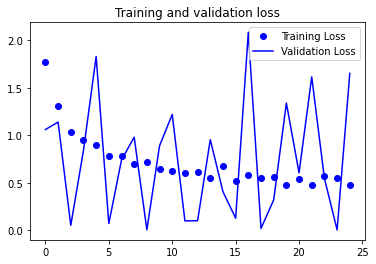

In [12]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

14/14 [==============================] - 41s 3s/step


0.6696428656578064